## Course Project: Exploratory Data Analysis

### Description of the Data Set and its attributes
#### Objective: 
The objective of this report is to analyze the data collected on works on public roads and present the results obtained clearly and objectively. The study data reflects works highly oriented to public services located in Montevideo, Uruguay. A clear example of the works may be repairs of services corresponding to the supply of drinking water, electricity, sanitation, and gas, among others. Among the main attributes of the data can be found those described below.

Data set:
- nro_obra, refers to the work number.
- tipo_remocion, refers to the work location, sidewalk, or driveway.
- fecha_inicio, fecha_fin, refers to the execution period of the work.
- ubicacion, refers to the location of the work.
- propietario, refers to the state entity that owns the work.

### Retrieving Data & Data Cleaning 
#### Initial plan for data exploration
Import all necessary packages used along with the EDA.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

Load and read the data

In [2]:
filepath = "ObrProg.csv"
data = pd.read_csv(filepath)
data.head()

,ID,nro_remocion,nro_obra,nro_permiso,motivo_obra,tipo_obra,tipo_remocion,fecha_inicio,fecha_fin,propietario,...,fecha_alta,Fcrea,Ucrea,Fact,Uact,diametro,tipo_pavimento,tipo_equipo,plazo_total,vigente
0,373612,1029638,441067,1,REPARACION REDES DE SANEAMIENTO,PERMISO OBRA VIA PUBLICA,ACERA,2019-12-14 00:00:00.0,2020-03-05 00:00:00.0,MUNICIPIO DE MONTEVIDEO,...,20191202,2-Dec-19,IM2000699,2-Dec-19,IM2000699,0.0,BALDOSAS,0,15,N
1,373613,1029646,441070,1,REPARACION REDES DE SANEAMIENTO,PERMISO OBRA VIA PUBLICA,ACERA,2019-12-10 00:00:00.0,2020-02-14 00:00:00.0,MUNICIPIO DE MONTEVIDEO,...,20191202,2-Dec-19,IM2000699,2-Dec-19,IM2000699,0.0,HORMIGON,0,15,N
2,373614,1029648,441071,1,REPARACION REDES DE SANEAMIENTO,PERMISO OBRA VIA PUBLICA,ACERA,NaN,2019-12-26 00:00:00.0,MUNICIPIO DE MONTEVIDEO,...,20191202,2-Dec-19,IM2000699,2-Dec-19,IM2000699,0.0,BALDOSAS,0,15,N
3,373615,1029650,441072,1,REPARACION REDES DE SANEAMIENTO,PERMISO OBRA VIA PUBLICA,ACERA,NaN,2020-02-04 00:00:00.0,MUNICIPIO DE MONTEVIDEO,...,20191202,2-Dec-19,IM2000699,2-Dec-19,IM2000699,0.0,HORMIGON,0,15,N
4,373616,1029655,441074,1,REPARACION REDES DE SANEAMIENTO,PERMISO OBRA VIA PUBLICA,ACERA,2019-12-11 00:00:00.0,2020-01-27 00:00:00.0,MUNICIPIO DE MONTEVIDEO,...,20191202,2-Dec-19,IM2000699,2-Dec-19,IM2000699,0.0,BALDOSAS,0,15,N


Check the Datatype and Strcuture

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5265 non-null   int64  
 1   nro_remocion                5265 non-null   int64  
 2   nro_obra                    5265 non-null   int64  
 3   nro_permiso                 5265 non-null   int64  
 4   motivo_obra                 5265 non-null   object 
 5   tipo_obra                   5265 non-null   object 
 6   tipo_remocion               5265 non-null   object 
 7   fecha_inicio                1979 non-null   object 
 8   fecha_fin                   2956 non-null   object 
 9   propietario                 5265 non-null   object 
 10  adjudicatario               5265 non-null   object 
 11  ejecutante                  5265 non-null   object 
 12  nro_cont_o_lici             5208 non-null   object 
 13  ubicacion                   5265 

Notice that 2 columns have 0 non-null values:
 - 17  fecha_recepcion_provisoria  0 non-null      float64
 - 18  fecha_recepcion_definitiva  0 non-null      float64
 
Since they have no values, let's drop those columns.

In [4]:
OriginalData = data.copy() # Save the original data set
data.drop(['fecha_recepcion_provisoria','fecha_recepcion_definitiva'],axis=1,inplace=True)
print(data.columns.tolist()) 

['ID', 'nro_remocion', 'nro_obra', 'nro_permiso', 'motivo_obra', 'tipo_obra', 'tipo_remocion', 'fecha_inicio', 'fecha_fin', 'propietario', 'adjudicatario', 'ejecutante', 'nro_cont_o_lici', 'ubicacion', 'fecha_solicitud', 'fecha_autorizacion', 'plazo_autorizado', 'inspector', 'cantidad', 'longitud', 'ancho', 'fecha_alta', 'Fcrea', 'Ucrea', 'Fact', 'Uact', 'diametro', 'tipo_pavimento', 'tipo_equipo', 'plazo_total', 'vigente']


Let's analyze the columns with large missing data.

- 7   fecha_inicio                1979 non-null   object 
- 8   fecha_fin                   2956 non-null   object
- 20  cantidad                    1439 non-null   float64
- 28  diametro                    3788 non-null   float64
- 32  vigente                     3581 non-null   object 

Since the fecha_inicio and fecha_fin columns has a lot of missing values, we will eliminate them and use fecha_autorizacion and plazo_autorizado instead.

In [5]:
data.drop(['fecha_inicio','fecha_fin'],axis=1,inplace=True)
print(data.columns.tolist()) 

['ID', 'nro_remocion', 'nro_obra', 'nro_permiso', 'motivo_obra', 'tipo_obra', 'tipo_remocion', 'propietario', 'adjudicatario', 'ejecutante', 'nro_cont_o_lici', 'ubicacion', 'fecha_solicitud', 'fecha_autorizacion', 'plazo_autorizado', 'inspector', 'cantidad', 'longitud', 'ancho', 'fecha_alta', 'Fcrea', 'Ucrea', 'Fact', 'Uact', 'diametro', 'tipo_pavimento', 'tipo_equipo', 'plazo_total', 'vigente']


Let's delete useless data.

In [6]:
data.drop(['ID','nro_cont_o_lici','Fcrea','Fact','cantidad','fecha_alta','plazo_total','tipo_equipo','diametro','nro_remocion','nro_obra','inspector'],axis=1,inplace=True)
print(data.columns.tolist()) 

['nro_permiso', 'motivo_obra', 'tipo_obra', 'tipo_remocion', 'propietario', 'adjudicatario', 'ejecutante', 'ubicacion', 'fecha_solicitud', 'fecha_autorizacion', 'plazo_autorizado', 'longitud', 'ancho', 'Ucrea', 'Uact', 'tipo_pavimento', 'vigente']


Given the following proportions of unique values, we categorized the following columns as having only one value. In this way, we will eliminate these columns.

In [7]:

print(data.Ucrea.value_counts())
print('Proportion =' , 100*round(data.Ucrea.value_counts()[1]/data.Ucrea.value_counts()[0],3), '%')

print(data.Uact.value_counts())
print('Proportion =', 100*round(data.Uact.value_counts()[1]/data.Uact.value_counts()[0],3), '%')

print(data.vigente.value_counts())
print('Proportion =', 100*round(data.vigente.value_counts()[1]/data.vigente.value_counts()[0],3),'%')

print(data.tipo_obra.value_counts())
print('Proportion =' , 100*round(data.tipo_obra.value_counts()[1]/data.Ucrea.value_counts()[0],3), '%')

data.drop(['Ucrea','Uact','vigente','tipo_obra'],axis=1,inplace=True)
data.head()

USR_UCCRIU    5222
IM2000699       43
Name: Ucrea, dtype: int64
Proportion = 0.8 %
USR_UCCRIU    5222
IM2000699       43
Name: Uact, dtype: int64
Proportion = 0.8 %
N    3417
S     164
Name: vigente, dtype: int64
Proportion = 4.8 %
PERMISO OBRA VIA PUBLICA    4994
INTERVENCION MENOR           271
Name: tipo_obra, dtype: int64
Proportion = 5.2 %


,nro_permiso,motivo_obra,tipo_remocion,propietario,adjudicatario,ejecutante,ubicacion,fecha_solicitud,fecha_autorizacion,plazo_autorizado,longitud,ancho,tipo_pavimento
0,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,BRIG GRAL DIEGO LAMAS DESDE 1534 HASTA 1534 EN...,2019-11-27 00:00:00.0,2019-11-28 14:07:02.0,15.0,5.2,0.8,BALDOSAS
1,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,PROF FRANCISCO GAMEZ MARIN DESDE 2413 HASTA 24...,2019-11-27 00:00:00.0,2019-11-28 14:05:16.0,15.0,6.0,0.8,HORMIGON
2,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,AV ISLAS CANARIAS DESDE 4436 HASTA 4436 ENTRE ...,2019-11-27 00:00:00.0,2019-11-28 13:57:38.0,15.0,4.0,0.8,BALDOSAS
3,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,SEPEE DESDE 1787 HASTA 1787 ENTRE ALMIRON Y AV...,2019-11-27 00:00:00.0,2019-11-28 13:49:52.0,15.0,5.0,0.8,HORMIGON
4,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,JUAN J RAISSIGNIER DESDE 2539 HASTA 2539 ENTRE...,2019-11-27 00:00:00.0,2019-11-28 13:47:55.0,15.0,4.6,0.8,BALDOSAS


Let's review the Data information again.

In [8]:
data.isnull().sum().sort_values()

nro_permiso             0
motivo_obra             0
tipo_remocion           0
propietario             0
adjudicatario           0
ejecutante              0
ubicacion               0
fecha_solicitud         0
fecha_autorizacion     22
plazo_autorizado       22
longitud              375
ancho                 375
tipo_pavimento        375
dtype: int64


Let's correct the Date data to generate a Categorical Feature, also add some extra relevant data.

In [9]:
data['fecha_solicitud'] = data['fecha_solicitud'].apply(lambda x: x[:7])
data['fecha_autorizacion'] = data['fecha_solicitud'].apply(lambda x: x[:7])
data['Am2'] = data['longitud']*data['ancho'] 
data.head()

,nro_permiso,motivo_obra,tipo_remocion,propietario,adjudicatario,ejecutante,ubicacion,fecha_solicitud,fecha_autorizacion,plazo_autorizado,longitud,ancho,tipo_pavimento,Am2
0,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,BRIG GRAL DIEGO LAMAS DESDE 1534 HASTA 1534 EN...,2019-11,2019-11,15.0,5.2,0.8,BALDOSAS,4.16
1,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,PROF FRANCISCO GAMEZ MARIN DESDE 2413 HASTA 24...,2019-11,2019-11,15.0,6.0,0.8,HORMIGON,4.80
2,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,AV ISLAS CANARIAS DESDE 4436 HASTA 4436 ENTRE ...,2019-11,2019-11,15.0,4.0,0.8,BALDOSAS,3.20
3,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,SEPEE DESDE 1787 HASTA 1787 ENTRE ALMIRON Y AV...,2019-11,2019-11,15.0,5.0,0.8,HORMIGON,4.00
4,1,REPARACION REDES DE SANEAMIENTO,ACERA,MUNICIPIO DE MONTEVIDEO,GIBEROL S.A.,GIBEROL S.A.,JUAN J RAISSIGNIER DESDE 2539 HASTA 2539 ENTRE...,2019-11,2019-11,15.0,4.6,0.8,BALDOSAS,3.68


### Feature Engineering and Variable Transformation
Once we achieve clean data, we can focus on enhancing the features and encoding categorical features.

In [10]:
motivo_obra_counts = data['motivo_obra'].value_counts()
other_motivo_obra = list(motivo_obra_counts[motivo_obra_counts <= 100].index)
data['motivo_obra'] = data['motivo_obra'].replace(other_motivo_obra, 'VARIOS')
print(data['motivo_obra'].value_counts().sort_values(ascending=False),'\n')

adjudicatario_counts = data['adjudicatario'].value_counts()
other_adjudicatario = list(adjudicatario_counts[adjudicatario_counts <= 100].index)
data['adjudicatario'] = data['adjudicatario'].replace(other_adjudicatario, 'VARIOS')
print(data['adjudicatario'].value_counts().sort_values(ascending=False),'\n')

ejecutante_counts = data['ejecutante'].value_counts()
other_ejecutante = list(ejecutante_counts[ejecutante_counts <= 100].index)
data['ejecutante'] = data['ejecutante'].replace(other_ejecutante, 'VARIOS')
print(data['ejecutante'].value_counts().sort_values(ascending=False),'\n')

tipo_pavimento_counts = data['tipo_pavimento'].value_counts()
other_tipo_pavimento = list(tipo_pavimento_counts[tipo_pavimento_counts <= 400].index)
data['tipo_pavimento'] = data['tipo_pavimento'].replace(other_tipo_pavimento, 'VARIOS')
print(data['tipo_pavimento'].value_counts().sort_values(ascending=False),'\n')

REPARACION REDES DE SANEAMIENTO     1543
TENDIDO DE CABLE SUBTERRANEO        1342
CONEXIONES DOMICILIARIAS            1212
TENDIDO DE TUBERIAS                  562
VARIOS                               500
TENDIDO FIBRA OPTICA SUBTERRANEA     106
Name: motivo_obra, dtype: int64 

BYCIC LIMITADA                                         865
COMPAÑIA ELECTROTECNICA INDUSTRIAL S R L               780
POSSAMAI CONSTRUCCIONES LTDA.                          619
VARIOS                                                 608
GIBEROL S.A.                                           579
C I E M S A CONSTRUCCIONES E INSTALACIONES ELECTROM    425
ZIKNOR SA                                              370
GOFINAL S.A.                                           350
TEYMA URUGUAY S A                                      349
STILER  S.A.                                           193
CIETEL S.A.                                            127
Name: adjudicatario, dtype: int64 

BYCIC LIMITADA                     

In [11]:
data.loc[:,['plazo_autorizado','longitud','ancho','Am2']].describe().T

,count,mean,std,min,25%,50%,75%,max
plazo_autorizado,5243.0,9.523746,6.932082,1.0,5.0,7.00,15.0,90.0
longitud,4890.0,75.597272,126.569751,0.0,4.0,10.00,80.0,500.0
ancho,4890.0,0.810760,0.593473,0.0,0.4,0.80,1.0,12.0
Am2,4890.0,44.435868,84.377945,0.0,3.2,7.58,32.0,912.5


Let's transforn the Data to correct the distortion from the center (skewed data).

2.9751520807924634


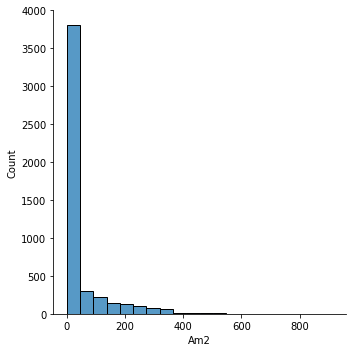

In [12]:
sns.displot(data['Am2'], bins = 20)
print(data['Am2'].skew())


-40.0 44.4 75.2


C:\Users\enzof\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Am2'>

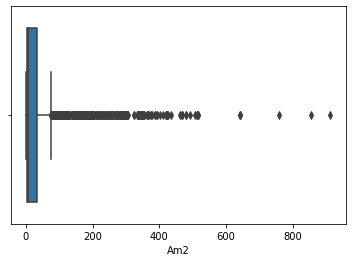

In [13]:
q25 = data['Am2'].quantile(q=0.25)
q75 = data['Am2'].quantile(q=0.75)
min = q25 - 1.5*(q75 - q25)
max = q75 + 1.5* (q75 - q25)
mean = round(data['Am2'].mean(),1)
print(min,mean,max)

sns.boxplot(data['Am2'])

Removing Outliers.

2.5155408974780795 11.927786413356362


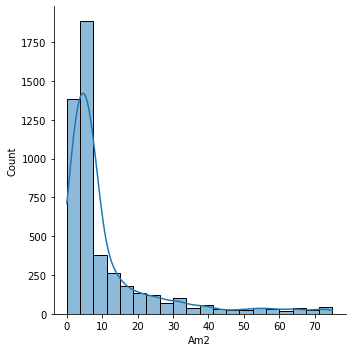

In [14]:
list(data['Am2'][data['Am2'] > max].values)
mean = data['Am2'][data['Am2'] < max].mean()

data['Am2'] = data['Am2'].replace(list(data['Am2'][data['Am2'].values > max]), mean-5) 
sns.displot(data['Am2'], bins = 20, kde=True)
print(data['Am2'].skew(),mean)


Correcting skewed data with log1p data transformation.

0.4291329392992202


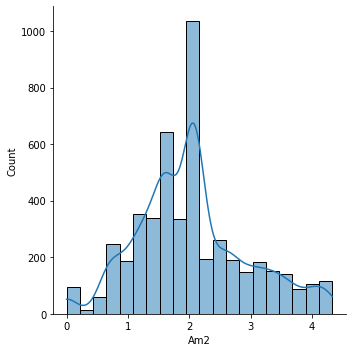

In [15]:
data['Am2'] = data['Am2'].apply(np.log1p)
sns.displot(data['Am2'], bins = 20, kde=True)
print(data['Am2'].skew())

2.2341593115812013


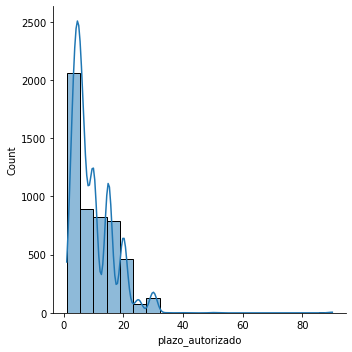

In [16]:
sns.displot(data['plazo_autorizado'], bins = 20, kde=True)
print(data['plazo_autorizado'].skew())

0.2660176548850139


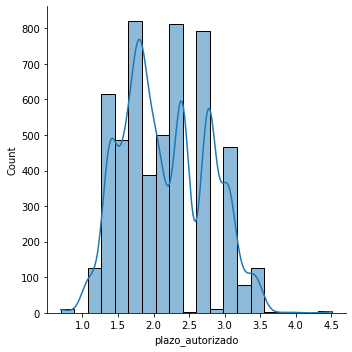

In [17]:
data['plazo_autorizado'] = data['plazo_autorizado'].apply(np.log1p)
sns.displot(data['plazo_autorizado'], bins = 20, kde=True)
print(data['plazo_autorizado'].skew())

Finally, let's do some One-hot Encoding to some relevant features.

In [18]:
df = pd.get_dummies(data, columns = ['motivo_obra','tipo_remocion','propietario','adjudicatario','ejecutante','tipo_pavimento'], drop_first = True) 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nro_permiso,5265.0,5.692498,12.922283,1.000000,1.000000,1.000000,2.000000,106.000000
plazo_autorizado,5243.0,2.170802,0.596132,0.693147,1.791759,2.079442,2.772589,4.510860
longitud,4890.0,75.597272,126.569751,0.000000,4.000000,10.000000,80.000000,500.000000
ancho,4890.0,0.810760,0.593473,0.000000,0.400000,0.800000,1.000000,12.000000
Am2,4890.0,2.033535,0.910362,0.000000,1.435085,2.070374,2.555676,4.330733
motivo_obra_REPARACION REDES DE SANEAMIENTO,5265.0,0.293067,0.455212,0.000000,0.000000,0.000000,1.000000,1.000000
motivo_obra_TENDIDO DE CABLE SUBTERRANEO,5265.0,0.254891,0.435841,0.000000,0.000000,0.000000,1.000000,1.000000
motivo_obra_TENDIDO DE TUBERIAS,5265.0,0.106743,0.308815,0.000000,0.000000,0.000000,0.000000,1.000000
motivo_obra_TENDIDO FIBRA OPTICA SUBTERRANEA,5265.0,0.020133,0.140468,0.000000,0.000000,0.000000,0.000000,1.000000
motivo_obra_VARIOS,5265.0,0.094967,0.293197,0.000000,0.000000,0.000000,0.000000,1.000000


Looking at the relationship between numerical variables using pair plots and correlation plots

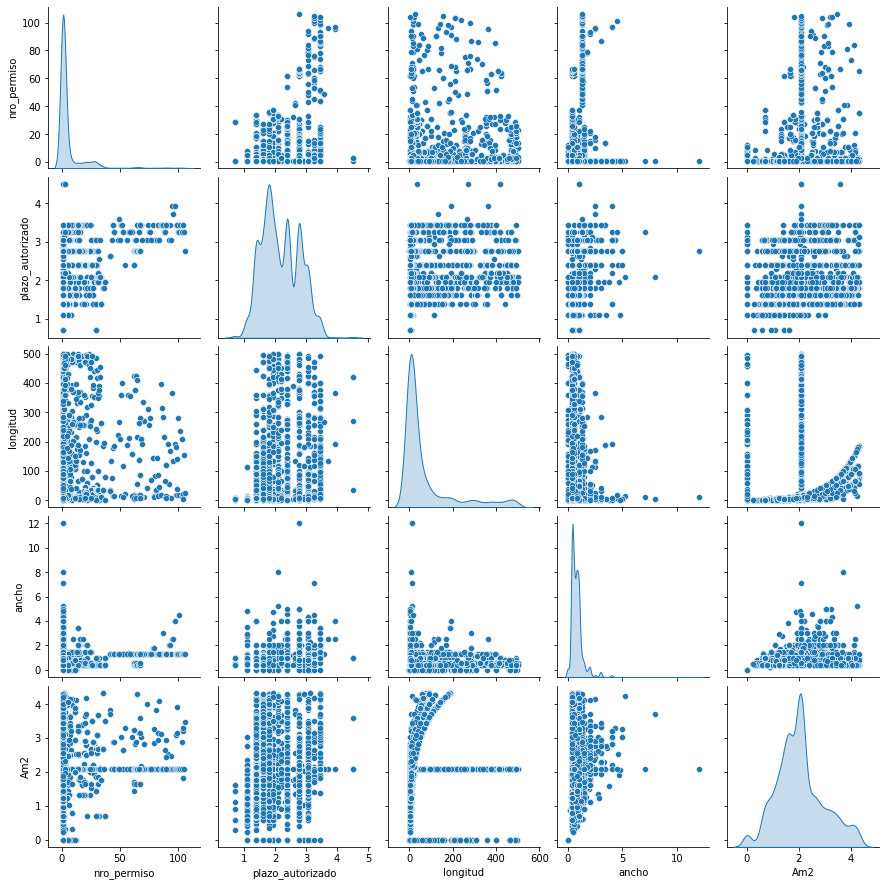

In [19]:
sns.pairplot(data, diag_kind="kde")  

<AxesSubplot:>

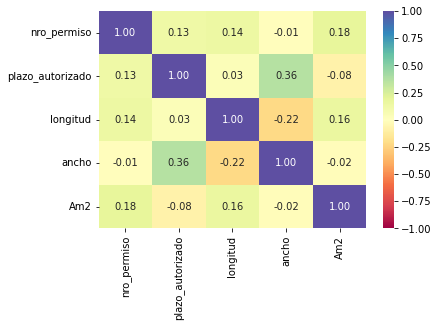

In [20]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

As can be seen in both the pair plot and the heatmap, the analyzed data show a low correlation with each other. In conclusion, the analyzed set is not a good set for the development of the project.

Although the conclusions obtained were not positive, we can express the following observations.

We can see the evolution of square meters of works on public roads throughout the months of the year.

<AxesSubplot:xlabel='fecha_solicitud', ylabel='Am2'>

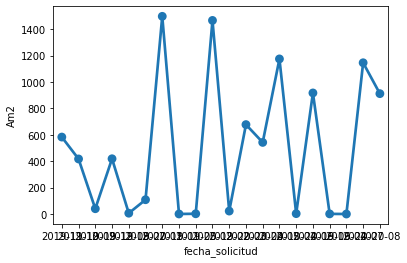

In [21]:
sns.pointplot(x='fecha_solicitud', y='Am2', data=data, estimator=sum, ci=None)

Or we can also see the square meters of work by owner, successful bidder and performer.

<AxesSubplot:xlabel='propietario', ylabel='Am2'>

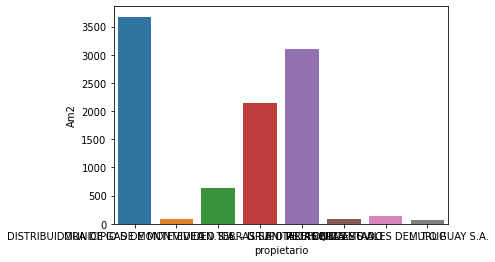

In [22]:
sns.barplot(y='Am2', x = 'propietario', data = data, estimator=sum, ci=None)

<AxesSubplot:xlabel='adjudicatario', ylabel='Am2'>

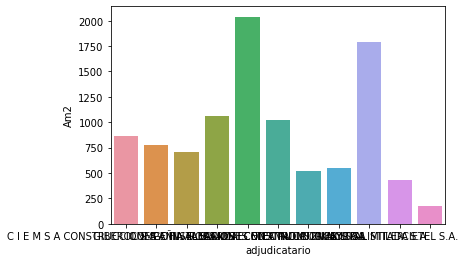

In [23]:
sns.barplot(y='Am2', x = 'adjudicatario', data = data, estimator=sum, ci=None)

<AxesSubplot:xlabel='ejecutante', ylabel='Am2'>

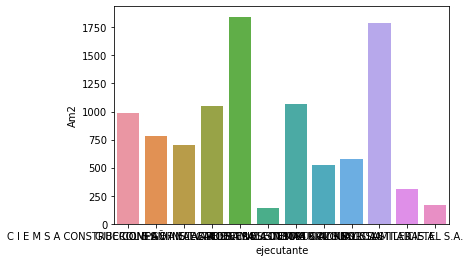

In [24]:
sns.barplot(y='Am2', x = 'ejecutante', data = data, estimator=sum, ci=None)

### Hypothesis Testing
Next we are going to formulate 3 hypotheses about the data set.

H1) Since the owner is the MUNICIPALITY OF MONTEVIDEO, the average square meters of work is 4m2.

H2) Since the owner is the OBRAS SANITARIAS DEL ESTADO, the average authorized term is 15 days.  
            
H3) Since the work is a REPAIR IN THE SANITATION NETWORK, the average square meters of work is 2m.

Let's conclude with a formal significance test for the H1 hypotheses and discuss the results.

In [25]:
from scipy import stats 
from statistics import NormalDist

Let's obtain the histodgram of square meters of work for the owner: MUNICIPALITY OF MONTEVIDEO.

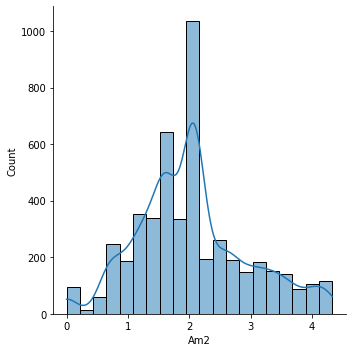

In [26]:
data['propietario'] = data['propietario'][data['propietario'] == 'MUNICIPIO DE MONTEVIDEO']
sns.displot(data['Am2'], bins = 20, kde=True)


Let's construct the normal distribution from the data set previously shown.

In [27]:
mean = data['Am2'].mean()
std = data['Am2'].std()
print('mean =',round(mean,3),'\n','std =',round(std,3),'\n','skew =', round(data['Am2'].skew(),3))

normal = NormalDist(mu=mean, sigma=std).cdf(4)
prob = 1 - normal

print('prob =',round(prob*100, 1),"% \n",round(normal,3))


mean = 2.034 
 std = 0.91 
 skew = 0.429
prob = 1.5 % 
 0.985


Given the probability of 1.5% that the average square meters of work is 4m2, the proposed hypothesis is rejected and it is stated that the square meters of work are less than 4m2.

### Summary
Finally, various hypotheses can be made on the set of data and more relevant information can be collected. In summary, the quality of the initial data is poor, having to carry out extensive data cleaning. On the other hand, it is convenient to request more numerical type data concerning the works executed. This allows us to study in greater depth the intercorrelations between the features.